In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
titanic=pd.read_csv('cleaned_titanic.csv')

## Summary Statistics

In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,775.000000,775.000000,775.00000,775.000000,775.000000,775.000000,775.000000
mean,445.806452,0.339355,2.48000,0.355978,0.437419,0.340645,0.034786
std,260.116285,0.473796,0.73439,0.160620,0.899838,0.785914,0.026503
min,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,213.500000,0.000000,2.00000,0.271174,0.000000,0.000000,0.015412
50%,450.000000,0.000000,3.00000,0.346569,0.000000,0.000000,0.025374
75%,670.500000,1.000000,3.00000,0.421965,1.000000,0.000000,0.050749
max,891.000000,1.000000,3.00000,1.000000,5.000000,6.000000,0.126872


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Name         775 non-null    object 
 4   Age          775 non-null    float64
 5   SibSp        775 non-null    int64  
 6   Parch        775 non-null    int64  
 7   Ticket       775 non-null    object 
 8   Fare         775 non-null    float64
 9   Sex_female   775 non-null    bool   
 10  Sex_male     775 non-null    bool   
 11  Embarked_C   775 non-null    bool   
 12  Embarked_Q   775 non-null    bool   
 13  Embarked_S   775 non-null    bool   
dtypes: bool(5), float64(2), int64(5), object(2)
memory usage: 58.4+ KB


## Histograms & Boxplots

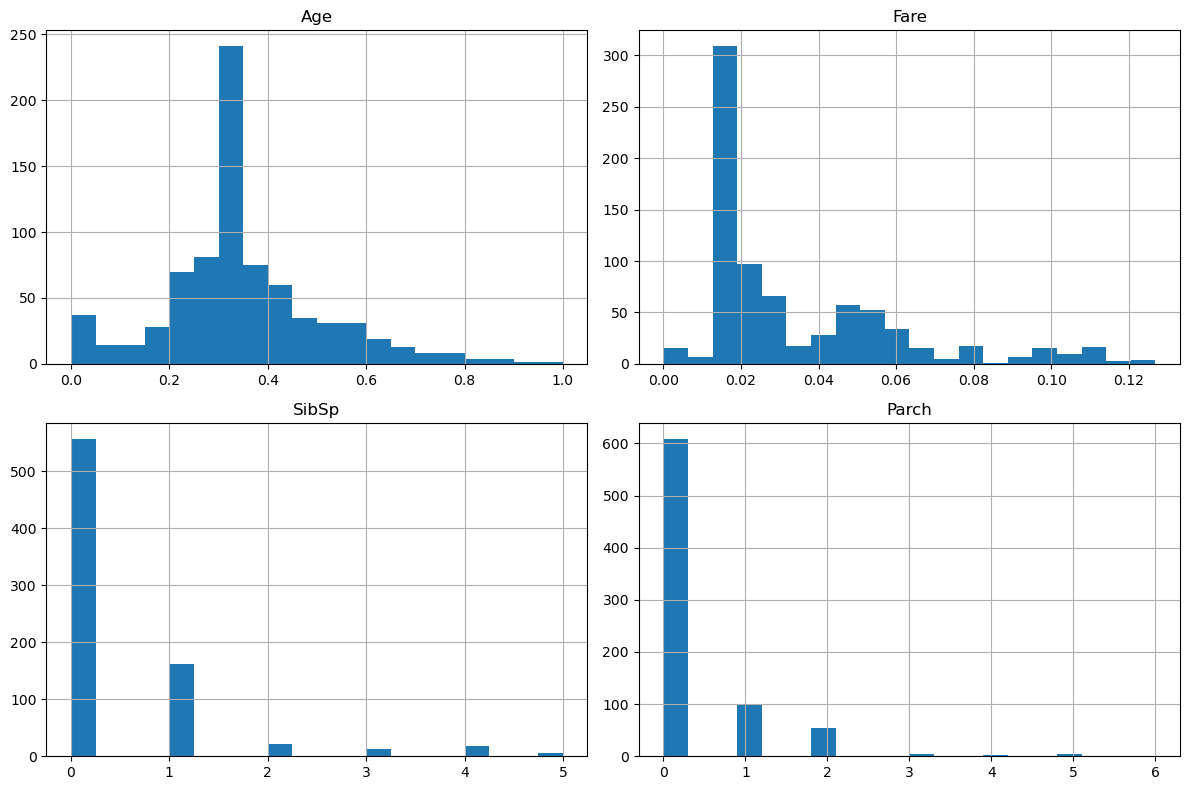

In [12]:
# Histograms
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
titanic[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

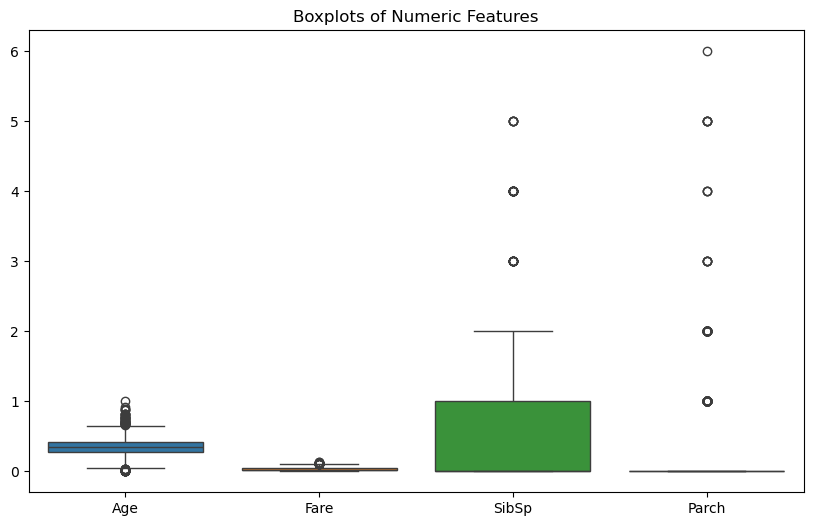

In [13]:
# Boxplots for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=titanic[numeric_cols])
plt.title('Boxplots of Numeric Features')
plt.show()

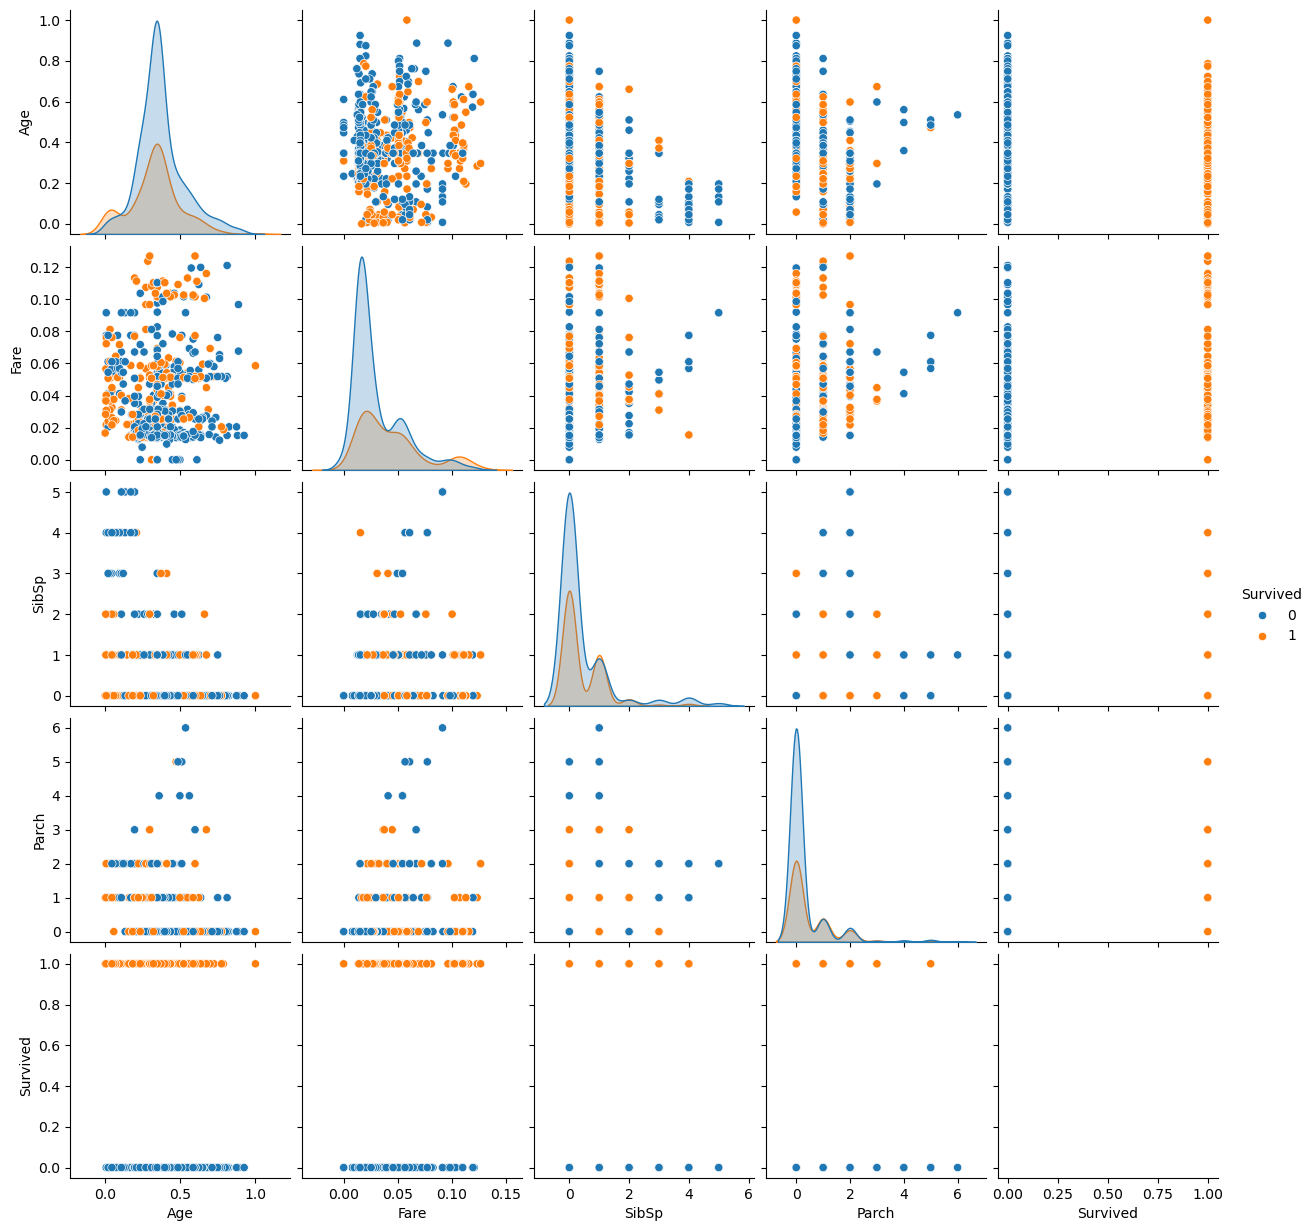

In [15]:
# Pairplot to visually inspect relationships and class separation
sns.pairplot(titanic, vars=numeric_cols + ['Survived'], hue='Survived')
plt.show()

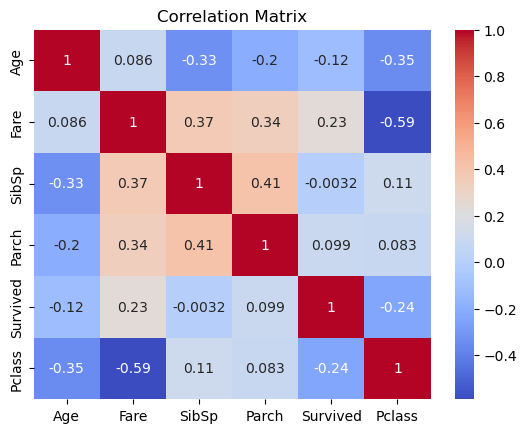

In [16]:
# Correlation matrix to see strength/weakness of linear relationships
corr = titanic[numeric_cols + ['Survived', 'Pclass']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Categorical Feature EDA

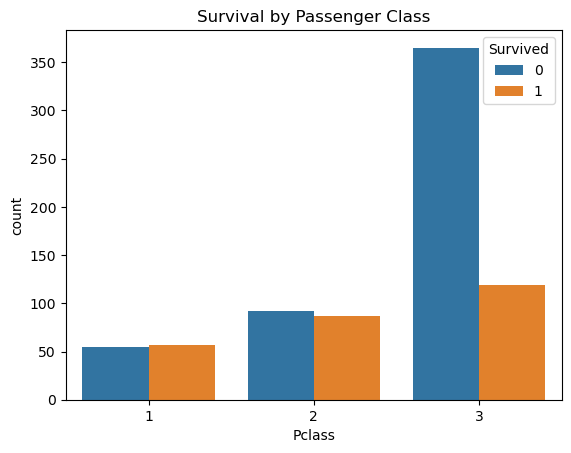

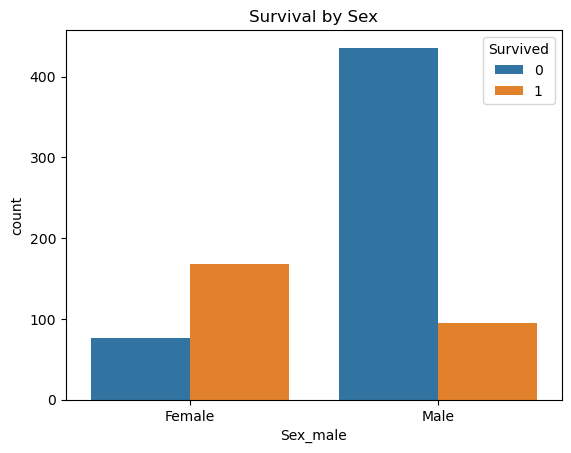

In [18]:
# Survival likelihood by class
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival by Passenger Class')
plt.show()

# Survival likelihood by gender (Sex_male used because data is already encoded)
sns.countplot(x='Sex_male', hue='Survived', data=titanic)
plt.title('Survival by Sex')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

## Insights from EDA

### Patterns and Trends
- Most passengers paid very low fares; a few paid very high fares (right-skewed distribution).
- Younger ages are common; there are some infants and very elderly passengers.
- Survival rates are higher among women and first/second class passengers.
- Many passengers traveled alone or with just one family member (SibSp, Parch mostly 0 or 1).
- Embarked location “S” is dominant, but survival is less influenced by it compared to class, gender, or fare.

### Anomalies
- Outliers in Fare (few passengers with very high fares).
- Extreme values for Age (very young infants, very old individuals, possible data entry artifacts).
- Unusually large families (SibSp or Parch with high values, rare cases).


### Feature-level Inferences
- **Age:** More children and young adults, some infants and elderly; children and women had higher survival.
- **Fare:** High fare correlated with higher survival rates.
- **Pclass:** First class survival much higher.
- **Sex:** Women and children preferentially survived.
- **SibSp/Parch:** Large families are rare and may have lowered survival; most people had 0 relatives onboard.